In [1]:
import pandas as pd 
from rdkit import Chem
from path import Path

import sys
import os
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
parent_parent_dir = os.path.dirname(parent_dir)

sys.path.append(parent_dir)
sys.path.append(parent_parent_dir)

from metrics_batch_created import calculate_uniqueness, calculate_novelty, calculate_validity, plot_molecule_sizes, plot_atom_distribution_dict, calculate_scores, plot_scores
from DataPipeline.preprocessing import smiles_to_torch_geometric, torch_geometric_to_networkx, plot_graph

In [2]:
zinc_path = Path('rndm_zinc_drugs_clean_3.csv')
zinc_df = pd.read_csv(zinc_path)

mol_path = Path('generated_molecules_1500_charged_3_embedding.csv')
mol_df = pd.read_csv(mol_path)

In [3]:
mol_list = mol_df['SMILES'].to_list()

In [4]:
validity, valid_molecules = calculate_validity(mol_list)

[14:19:25] non-ring atom 0 marked aromatic
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 9 10 13 14 15 16 17 18 19
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 23
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20 21 22
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 11 12 20 21 23 25
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 16 18
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 15
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 1 2 16
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 3 4 5 25 26
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 22 23 24
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20 21 22
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 16 17
[14:19:25] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 

In [5]:
not_valid = [mol for mol in mol_list if mol not in valid_molecules]

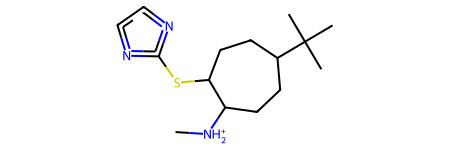

In [6]:
Chem.MolFromSmiles(not_valid[28], sanitize=False)

In [7]:
not_valid

['Cc1ccc(Nc2nc(SCC(=O)NCc3ccccc3F)nc(=O)c2C#N)cc1C',
 'Cc1cccc(OCc2cccccccc2C#N)c1C(=O)Br',
 'Cc1ccc(-c2nnc(N=C([O-])C(CC(C)C)CS(C)(=O)=O)n2)cc1',
 'COC(CN(C)C(=O)c1cnc2ccc(F)cc12)C(C)(C)C',
 'COc1ccc(CN2CC(C(=O)N(C)Cc3nc(=O)c4ccccc4n3)Oc3ccccc32)cc1OC',
 'OCC1CCCC1C[NH2+]Cc1ccnc1',
 'COc1ccc(NC(=O)CCc2c(C)nnc2C)cc1C[NH+]1CC(C)C(C)C(C)C1',
 'CCCN(C(=O)CSc1nc2ccc(F)cc2c1C#N)C1CCCCC1',
 'O=C(c1ccc(=O)nc1)N1CCc2cc([N+](=O)[O-])ccc21',
 'cc1cCN2CC3CC=CC(C)C3=C(OC(=O)C3=C(C4=C5C6=NCNN5C(N)N=C4c4c(C)ccn46)C4=C(C5=C=c(C6=NCCN6)c6=C5C(C5=Nc7c(C)ccc(C)n7N5)=C(NC(C)C)N=C6NCCC)OC5=C6C(=O)OC(=C=O)C7=C6C(=C6C8=C7C(=C(OC(C(=O)OC7=C(NC9CC9)N(CCC)C(C)N=C7C7CCCCC7)=C(C(=O)OC7(N9CCCCCC9)CCCCC7)C(=O)OC7(N9CCCCC9)CCCCC7)C=C8)C(=O)OC(C(=O)OC7=C8Nc9c(C)ccc(C)c9C7=NC(N)N8CC)=C7OC(=O)C(=O)OC7=C(C(=O)OC7=C=C8CCCC(C)C8C78CCCCC87CCCCC7)C78C9=C=C%10C%11=C(C%12=C=C%13C(N)N=NC%13O%12)C(=C%107)C(=O)C(=C%11C(=O)OC7(CCC)CCCC(C)C7)C(C7(CCC)CCCC(C)C7)=NN=C7N=NC%10=C7C(=C7N%10C(CC)CC7%10CCCCC%10)C7=C(C(=O)OC%10=C(C%11CCC

In [7]:
validity

0.8986666666666666

In [8]:
uniqueness, unique_molecules = calculate_uniqueness(valid_molecules)

In [9]:
uniqueness

1.0

In [10]:
novelty = calculate_novelty(unique_molecules, zinc_path)

100%|██████████| 1348/1348 [00:04<00:00, 290.10it/s]


In [11]:
novelty

1.0

In [13]:
scores = calculate_scores(valid_molecules)

In [11]:
scores_zinc = calculate_scores(zinc_df['smiles'].to_list())

KeyboardInterrupt: 

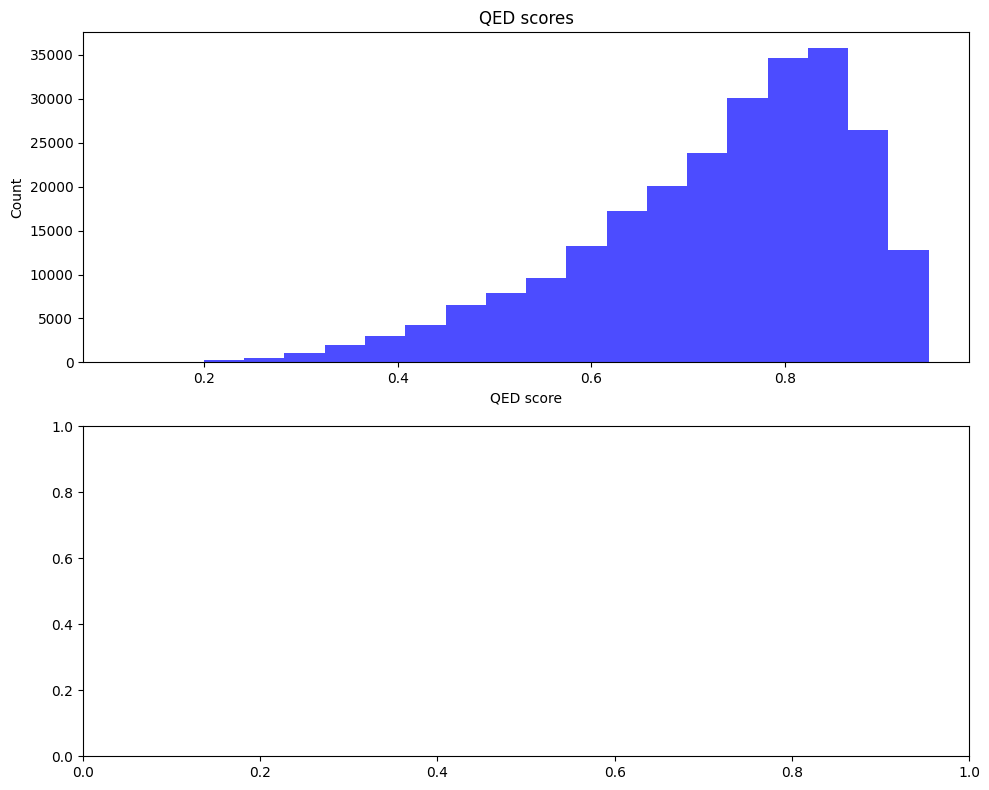

In [ ]:
plot_scores(scores_zinc)

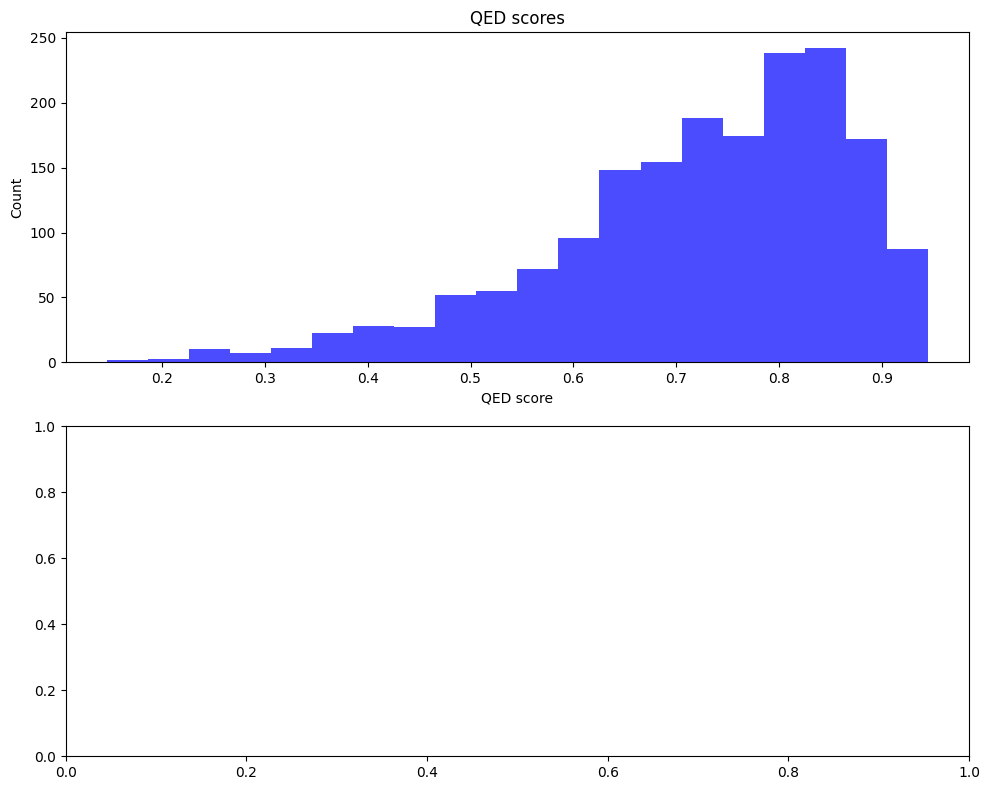

In [14]:
plot_scores(scores)

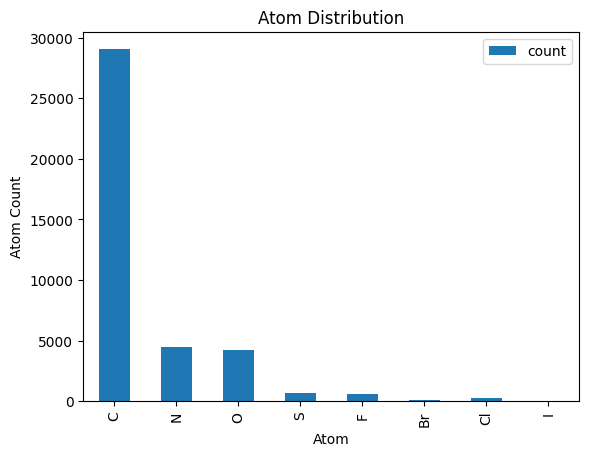

In [15]:
plot_atom_distribution_dict(valid_molecules)

In [16]:
plot_atom_distribution_dict(zinc_df['smiles'].to_list())

KeyboardInterrupt: 

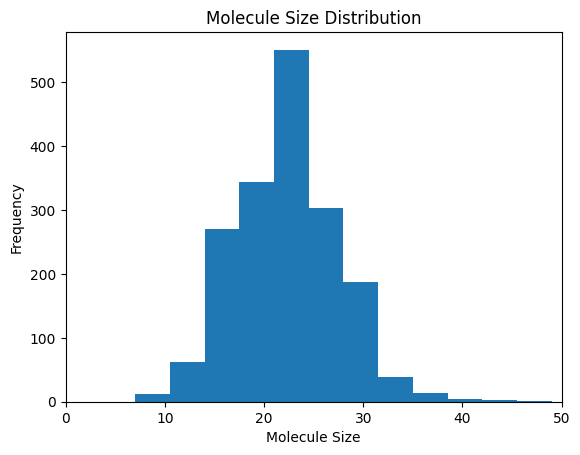

In [17]:
plot_molecule_sizes(valid_molecules)

In [20]:
def get_cycle_lengths(smiles):
    mol = Chem.MolFromSmiles(smiles)
    cycle_lengths = [len(cycle) for cycle in Chem.GetSymmSSSR(mol)]
    return cycle_lengths


df_valid = pd.DataFrame(valid_molecules, columns=['SMILES'])

df_valid['CycleLengths'] = df_valid['SMILES'].apply(get_cycle_lengths)


In [21]:
import matplotlib.pyplot as plt

# Plot histograms for cycle length in different rows of the same figure
def plot_histograms(data):
    fig, axs = plt.subplots(3, 2, figsize=(10, 10))
    axs[0, 0].hist(data['CycleLengths'].apply(lambda x: x.count(3)), bins=20)
    axs[0, 0].set_title('Cycle Length 3')
    axs[0, 1].hist(data['CycleLengths'].apply(lambda x: x.count(4)), bins=20)
    axs[0, 1].set_title('Cycle Length 4')
    axs[1, 0].hist(data['CycleLengths'].apply(lambda x: x.count(5)), bins=20)
    axs[1, 0].set_title('Cycle Length 5')
    axs[1, 1].hist(data['CycleLengths'].apply(lambda x: x.count(6)), bins=20)
    axs[1, 1].set_title('Cycle Length 6')
    axs[2, 0].hist(data['CycleLengths'].apply(lambda x: x.count(7)), bins=20)
    axs[2, 0].set_title('Cycle Length 7')
    axs[2, 1].hist(data['CycleLengths'].apply(lambda x: x.count(8)), bins=20)
    axs[2, 1].set_title('Cycle Length 8')
    plt.show()

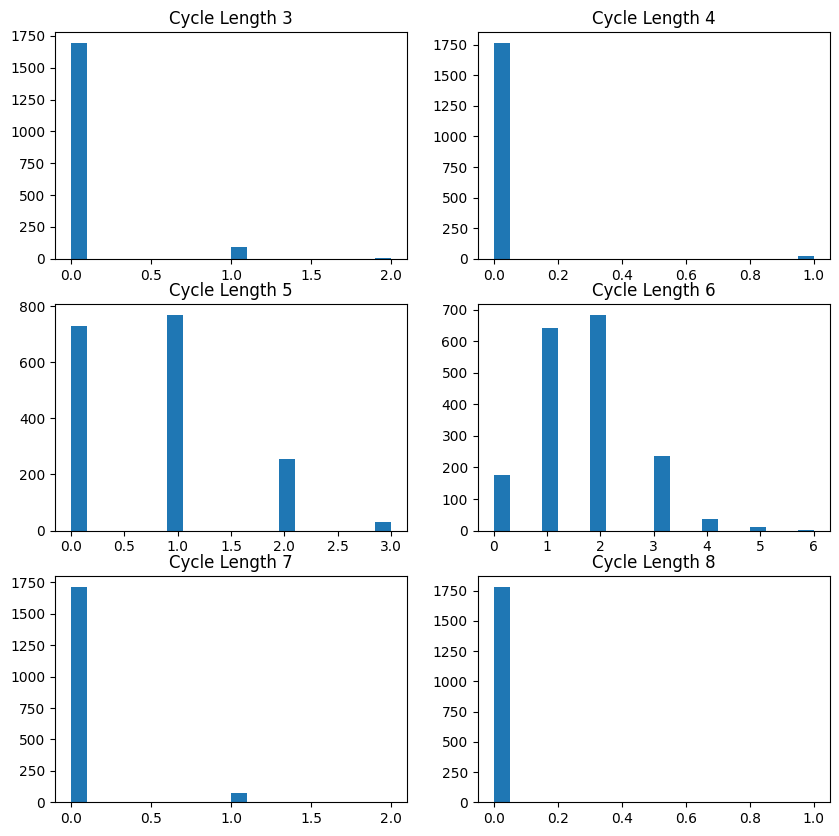

In [22]:
plot_histograms(df_valid)

In [23]:
from collections import Counter

def count_bonding_types(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Counter([bond.GetBondType() for bond in mol.GetBonds()])

<Axes: >

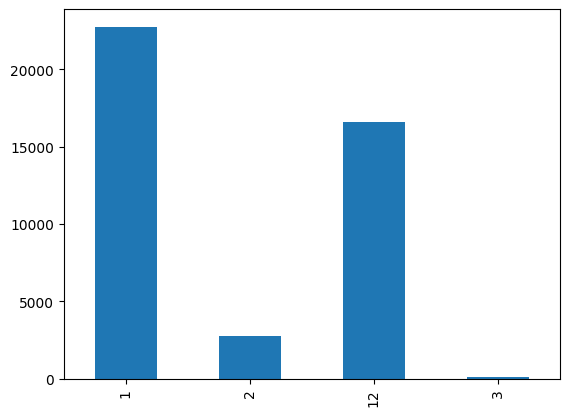

In [24]:
df_valid['BondingTypes'] = df_valid['SMILES'].apply(count_bonding_types)

#Plot 

df_valid['BondingTypes'].apply(pd.Series).fillna(0).astype(int).sum().plot.bar()